<a href="https://colab.research.google.com/github/codewithdebuu/Data-Science-and-Machine-Learning-Projects/blob/main/Bank_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Dataset/Loan Dataset.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
print("---Information:---")
print(df.info())
print("\n---Duplicate values:---")
print(df.duplicated().sum())
print("\n---NuN values:---")
print(df.isnull().sum())
print("\n Duplicate Values")
print(df.duplicated().sum())

---Information:---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

---Duplicate values:---
0

---NuN values:---
Loan_ID               0
Gender            

In [5]:
# Fill numeric columns
for col in df.select_dtypes(['int64', 'float64']):
  df[col] = df[col].fillna(df[col].median())
# Fill categorical columns
for col in df.select_dtypes('object'):
  df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


## Remove 'Loan_ID' column

In [6]:
df_2 = df.copy()
df_2 = df.drop(columns='Loan_ID')
df_2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Boxplot

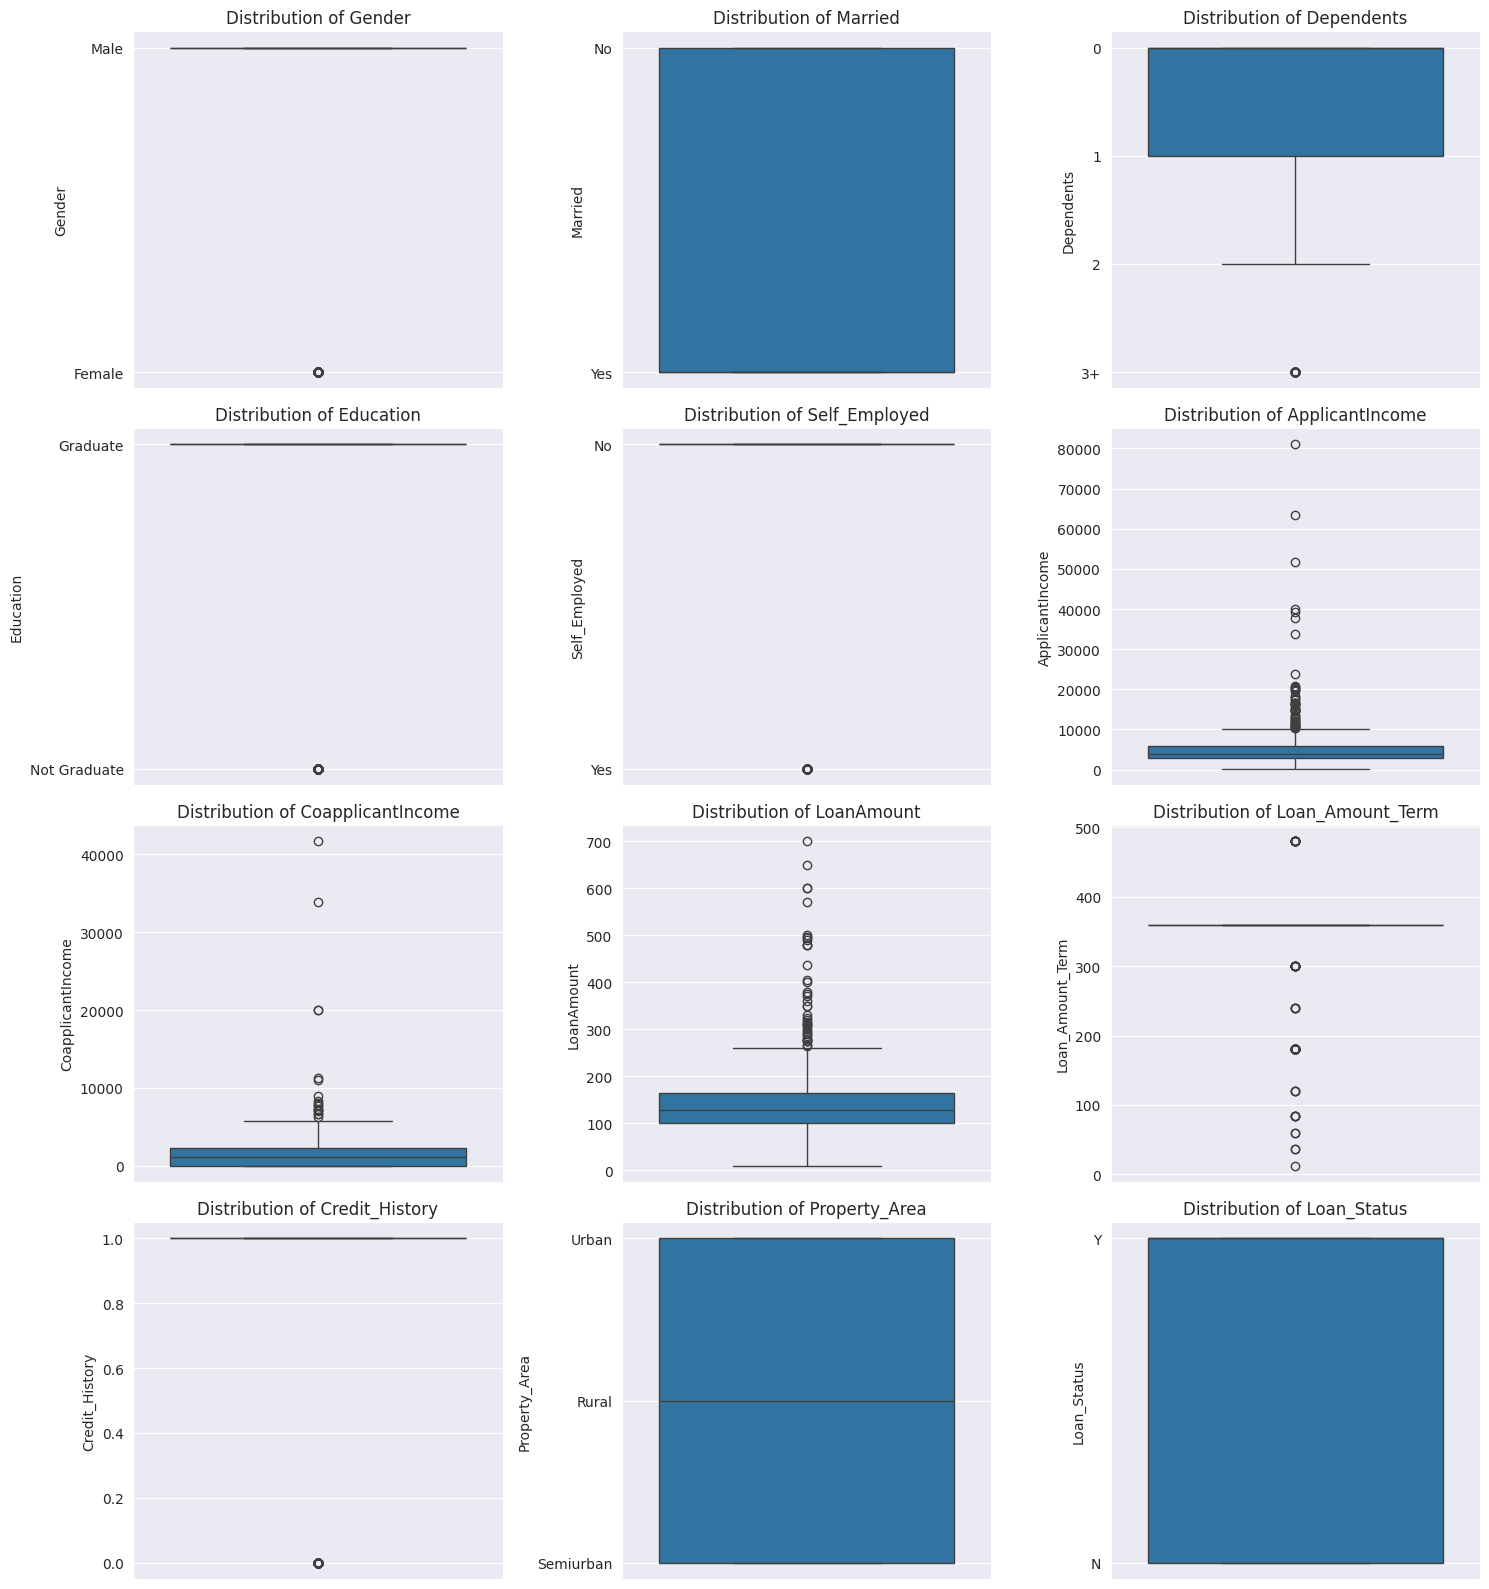

In [7]:
import math

# Number of charts per row
n_cols = 3

# Calculate required number of rows
n_rows = math.ceil(len(df_2.columns) / n_cols)

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

# Plot each column on its subplot
for i, col in enumerate(df_2.columns):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Hide any unused axes (if columns not multiple of 3)
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [8]:
df_2.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Outlier Remove

In [9]:
numeric_cols = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]

# Remove outliers using the IQR method
for col in numeric_cols:
    Q_1 = df_2[col].quantile(0.25)
    Q_3 = df_2[col].quantile(0.75)
    IQR = Q_3 - Q_1

    Lower_bound = Q_1 - (1.5 * IQR)
    Upper_bound = Q_3 + (1.5 * IQR)

    df_2 = df_2[(df[col] >= Lower_bound) & (df_2[col] <= Upper_bound)]

df_2.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


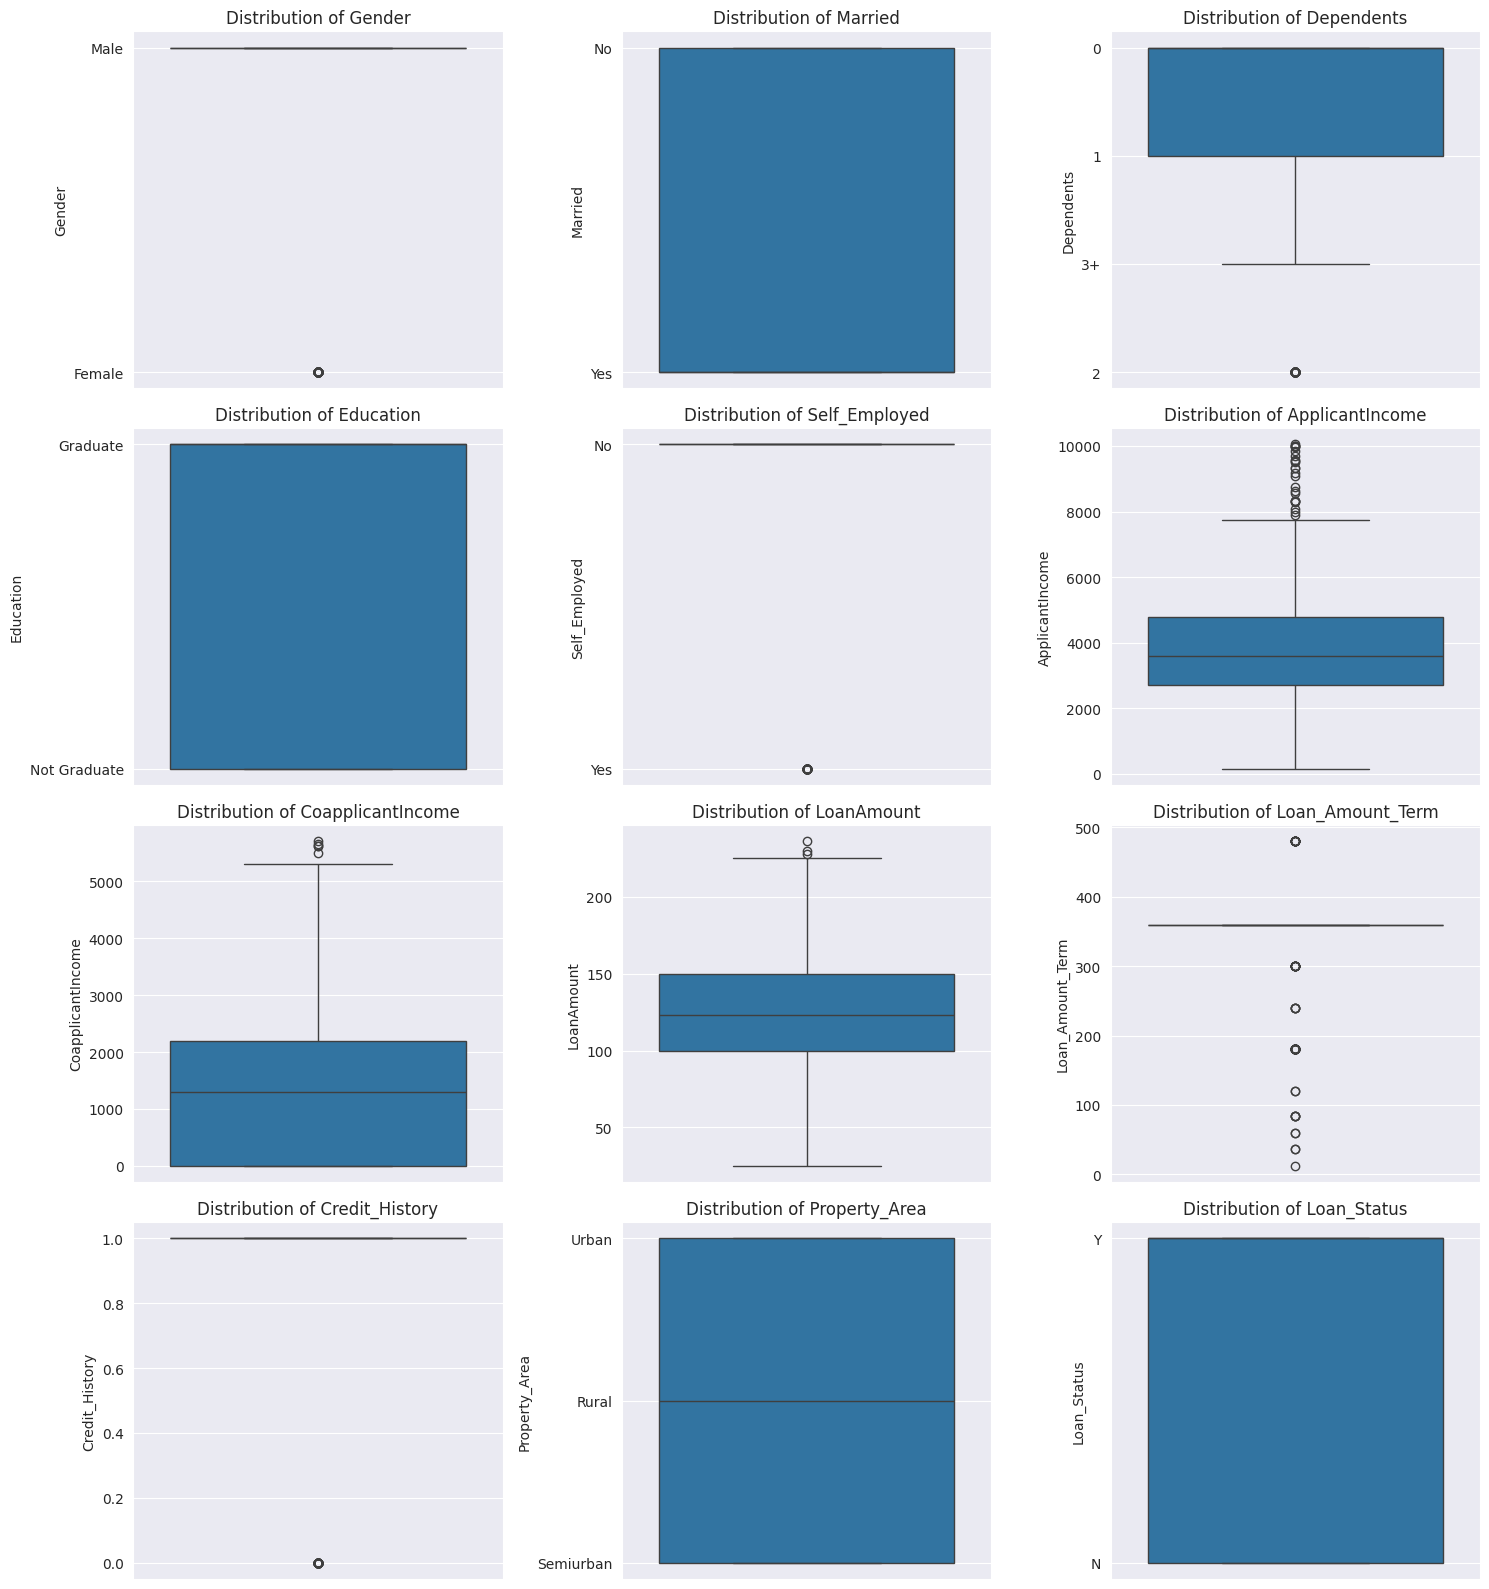

In [10]:
import math

# Number of charts per row
n_cols = 3

# Calculate required number of rows
n_rows = math.ceil(len(df_2.columns) / n_cols)

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

# Plot each column on its subplot
for i, col in enumerate(df_2.columns):
    sns.boxplot(df_2[col], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Hide any unused axes (if columns not multiple of 3)
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Lable Encoder

In [11]:
le = LabelEncoder()
df_obj = df_2.select_dtypes("object")

df_2[df_obj.columns] = df_obj.apply(lambda col: le.fit_transform(col))
df_2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


#  Histplot

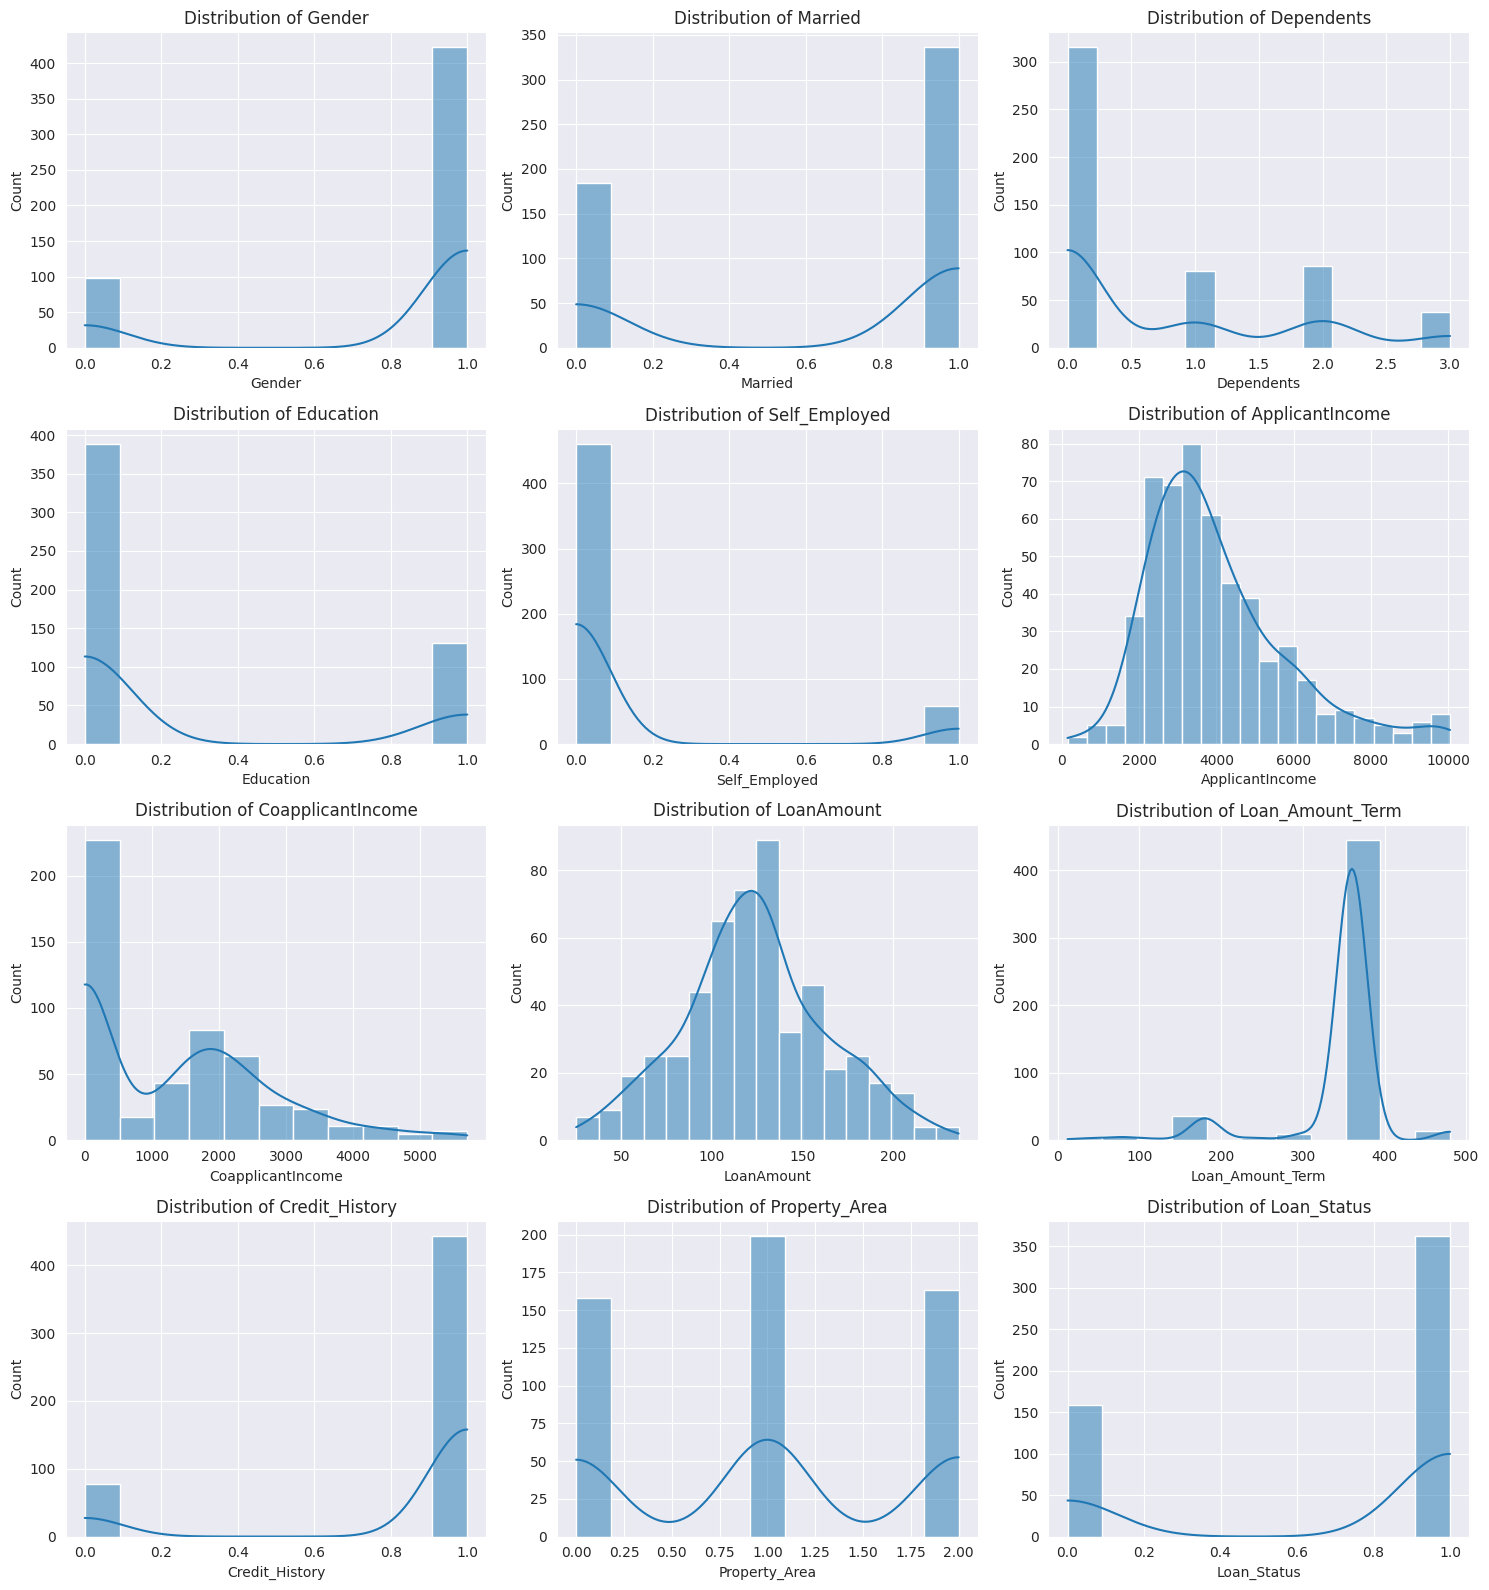

In [12]:
import math

# Number of charts per row
n_cols = 3

# Calculate required number of rows
n_rows = math.ceil(len(df_2.columns) / n_cols)

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

# Plot each column on its subplot
for i, col in enumerate(df_2.columns):
    sns.histplot(df_2[col], ax=axes[i], kde=True)
    axes[i].set_title(f"Distribution of {col}")

# Hide any unused axes (if columns not multiple of 3)
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [13]:
df_2.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,0.811538,0.646154,0.705769,0.251923,0.113462,3995.719231,1317.578692,123.651923,342.576923,0.851923,1.009615,0.696154
std,0.391457,0.478623,0.989329,0.434535,0.317462,1794.687196,1397.402837,39.749892,65.618547,0.355518,0.786387,0.460360
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,25.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2724.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3590.500000,1293.500000,123.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,4772.750000,2191.000000,150.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,10047.000000,5701.000000,236.000000,480.000000,1.000000,2.000000,1.000000


# Feature Scaling

In [14]:
num_cols = df_2.select_dtypes(include=['int64', 'float64']).columns
ss = StandardScaler()
df_2[num_cols] = ss.fit_transform(df_2[num_cols])

print("Successful.")

Successful.


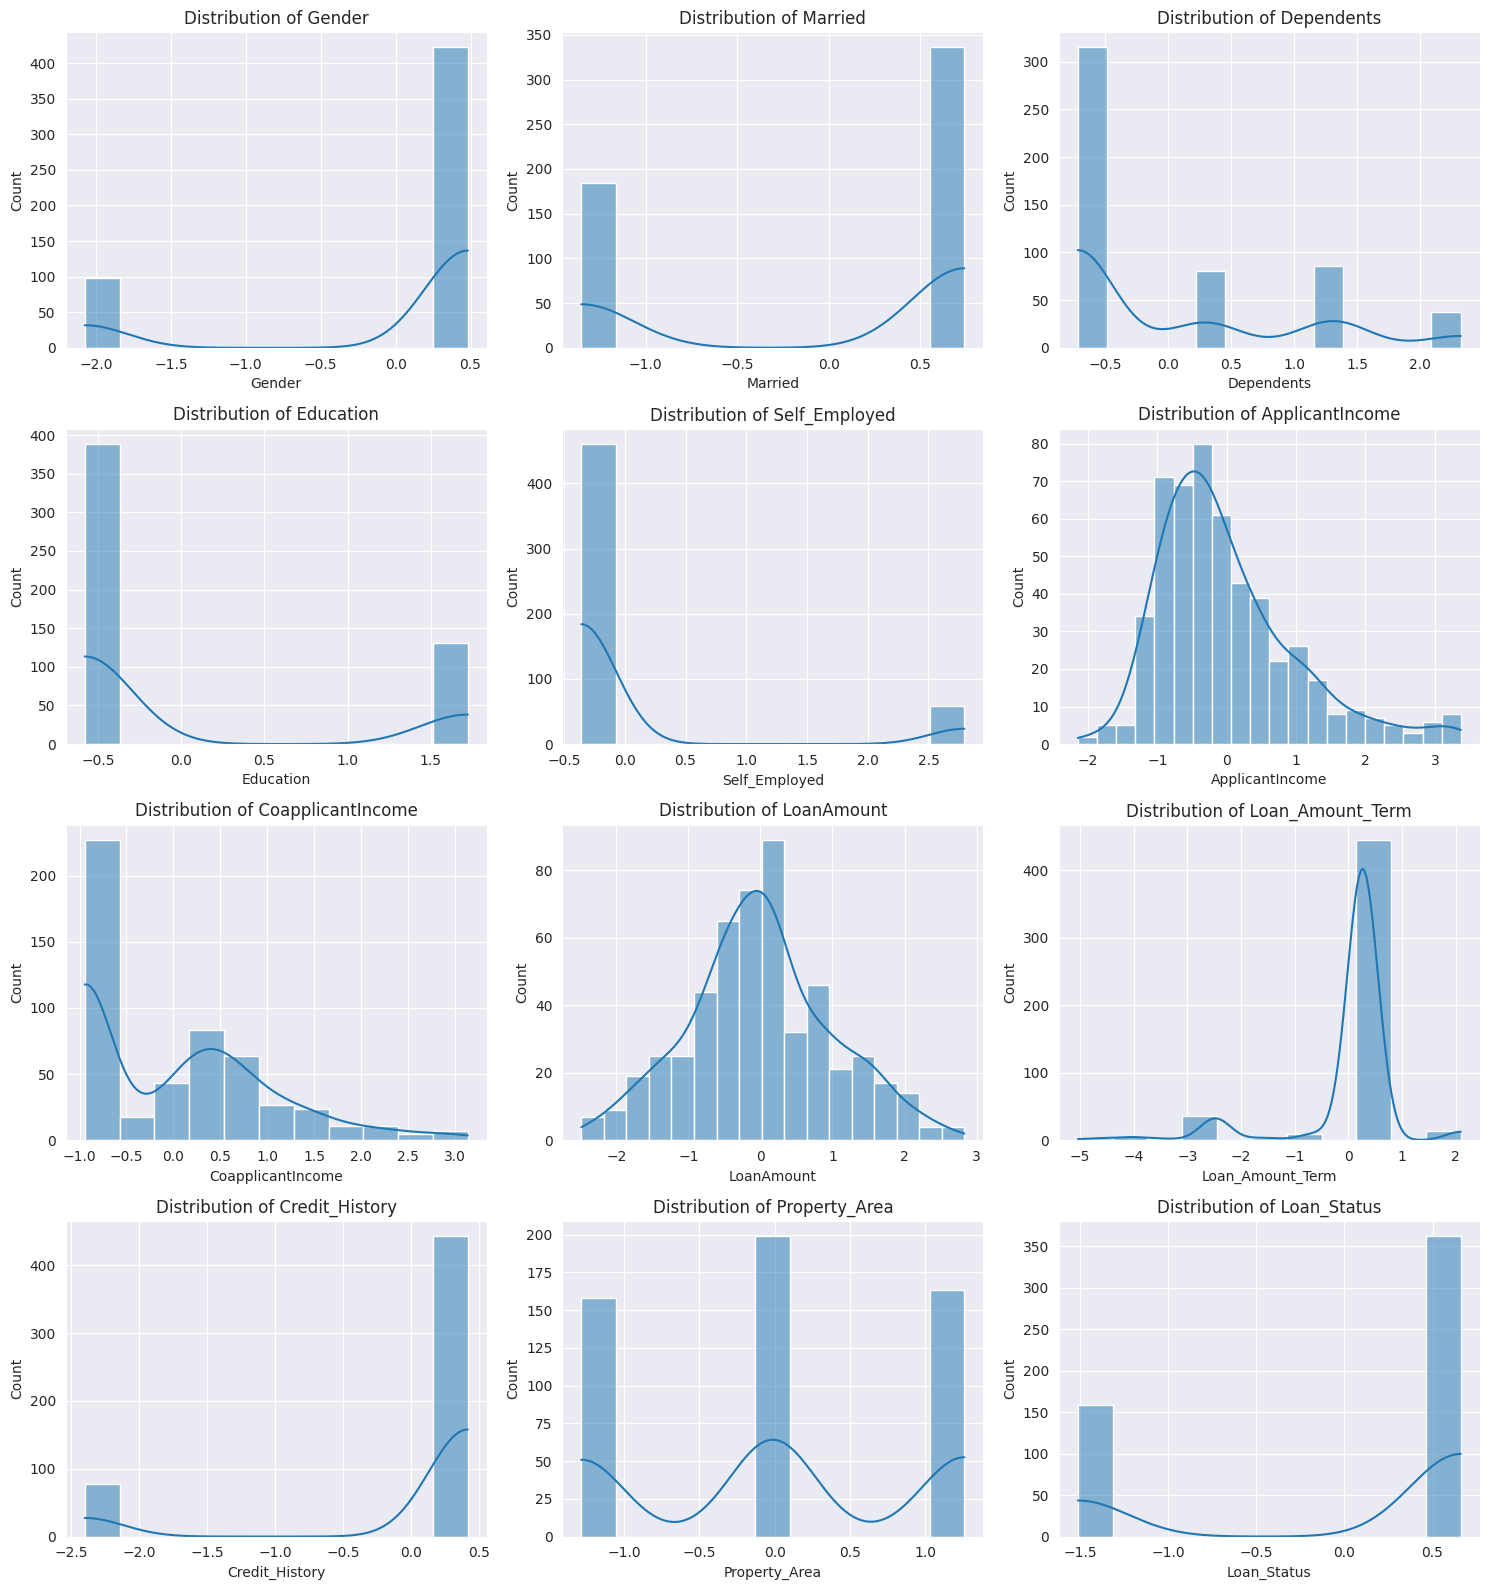

In [15]:
import math

# Number of charts per row
n_cols = 3

# Calculate required number of rows
n_rows = math.ceil(len(df_2.columns) / n_cols)

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

# Plot each column on its subplot
for i, col in enumerate(df_2.columns):
    sns.histplot(df_2[col], ax=axes[i], kde=True)
    axes[i].set_title(f"Distribution of {col}")

# Hide any unused axes (if columns not multiple of 3)
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Heat Map

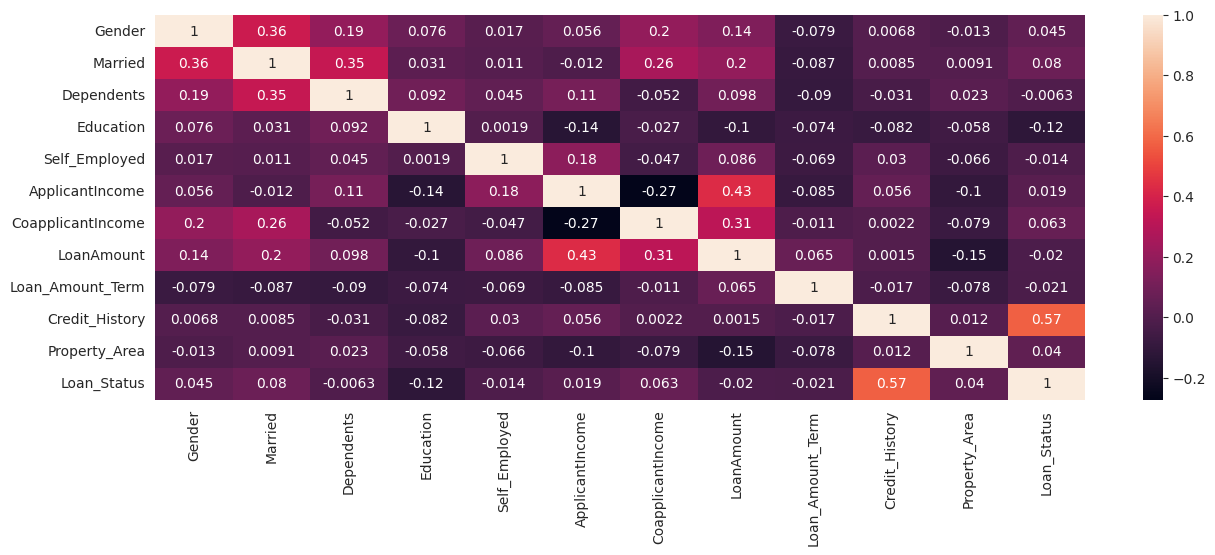

In [16]:
plt.figure(figsize=(15,5))
sns.heatmap(df_2.corr(),annot=True)
plt.show()

# Feature Selection and Model Selection

In [17]:
df_mod = df_2.copy()
df_mod.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


 Running Forward Feature Selection...


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]



 Running Backward Feature Selection...


100%|██████████| 11/11 [00:11<00:00,  1.08s/it]




Method used: Forward
Best number of features: 11
Best feature names: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
Best cross-validated accuracy: 0.8269
Runtime (s): 14.36

Method used: Backward
Best number of features: 6
Best feature names: ['Married', 'Education', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']
Best cross-validated accuracy: 0.8269
Runtime (s): 11.87


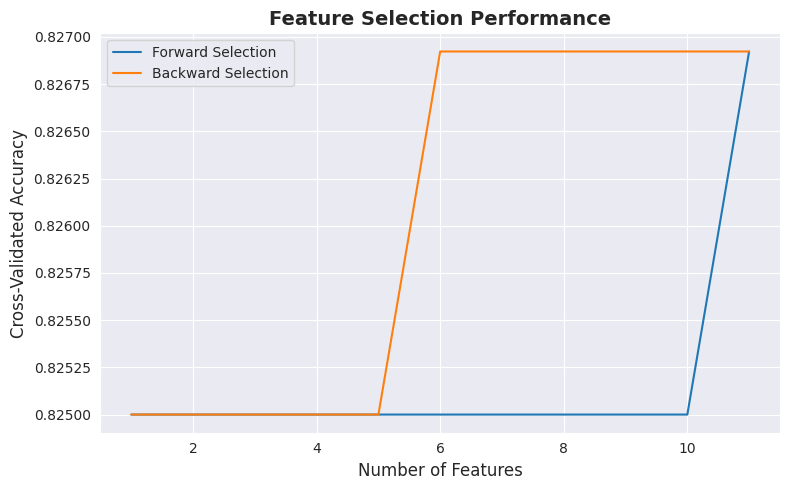


 Feature Comparison
Common features (6): ['Education', 'Married', 'CoapplicantIncome', 'ApplicantIncome', 'LoanAmount', 'Credit_History']

Unique to Forward (5): ['Loan_Amount_Term', 'Self_Employed', 'Dependents', 'Gender', 'Property_Area']

Unique to Backward (0): []


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold

# =============================
# FIX TARGET COLUMN (Binary Encode)
# =============================
df_mod['Loan_Status'] = df_mod['Loan_Status'].astype('category').cat.codes

# =============================
# Split features and target
# =============================
X = df_mod.drop(columns=['Loan_Status'], axis=1)
y = df_mod['Loan_Status']

# =============================
# SCALE FEATURES (clean & safe)
# =============================
num_cols = X.select_dtypes(include=['int64','float64']).columns
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[num_cols] = scaler.fit_transform(X[num_cols])

# =============================
# Initialize Logistic Regression
# =============================
lr = LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42)

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# =============================
# Run Sequential Feature Selection
# =============================
results = []
method_scores = {}

for method, forward_flag in [('Forward', True), ('Backward', False)]:
    print(f"\n Running {method} Feature Selection...")
    start_time = time.time()

    best_score = 0
    best_k = None
    best_features = None
    scores = []

    for k in tqdm(range(1, X.shape[1] + 1)):
        sfs = SequentialFeatureSelector(
            estimator=lr,
            k_features=k,
            forward=forward_flag,
            scoring='accuracy',
            cv=cv,
            n_jobs=-1
        )

        sfs.fit(X_scaled, y)
        scores.append(sfs.k_score_)

        # Track best result
        if sfs.k_score_ > best_score:
            best_score = sfs.k_score_
            best_k = k
            best_features = sfs.k_feature_idx_

    elapsed = round(time.time() - start_time, 2)
    selected_cols = X.columns[list(best_features)]
    method_scores[method] = scores

    results.append({
        "Method": method,
        "Best number of features": best_k,
        "Best feature names": list(selected_cols),
        "Best cross-validated accuracy": best_score,
        "Runtime (s)": elapsed
    })

# =============================
# Display Summary Results
# =============================
print("\n" + "=" * 65)
for r in results:
    print(f"\nMethod used: {r['Method']}")
    print(f"Best number of features: {r['Best number of features']}")
    print(f"Best feature names: {r['Best feature names']}")
    print(f"Best cross-validated accuracy: {r['Best cross-validated accuracy']:.4f}")
    print(f"Runtime (s): {r['Runtime (s)']}")

# =============================
# Plot Accuracy vs Number of Features
# =============================
plt.figure(figsize=(8, 5))
for method, scores in method_scores.items():
    sns.lineplot(x=range(1, X.shape[1] + 1), y=scores, label=f"{method} Selection")

plt.title("Feature Selection Performance", fontsize=14, fontweight='bold')
plt.xlabel("Number of Features", fontsize=12)
plt.ylabel("Cross-Validated Accuracy", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# =============================
# Compare Features Between Methods
# =============================
forward_features = set(results[0]['Best feature names'])
backward_features = set(results[1]['Best feature names'])

common_features = forward_features.intersection(backward_features)
unique_forward = forward_features - backward_features
unique_backward = backward_features - forward_features

print("\n Feature Comparison")
print("=" * 65)
print(f"Common features ({len(common_features)}): {list(common_features)}")
print(f"\nUnique to Forward ({len(unique_forward)}): {list(unique_forward)}")
print(f"\nUnique to Backward ({len(unique_backward)}): {list(unique_backward)}")


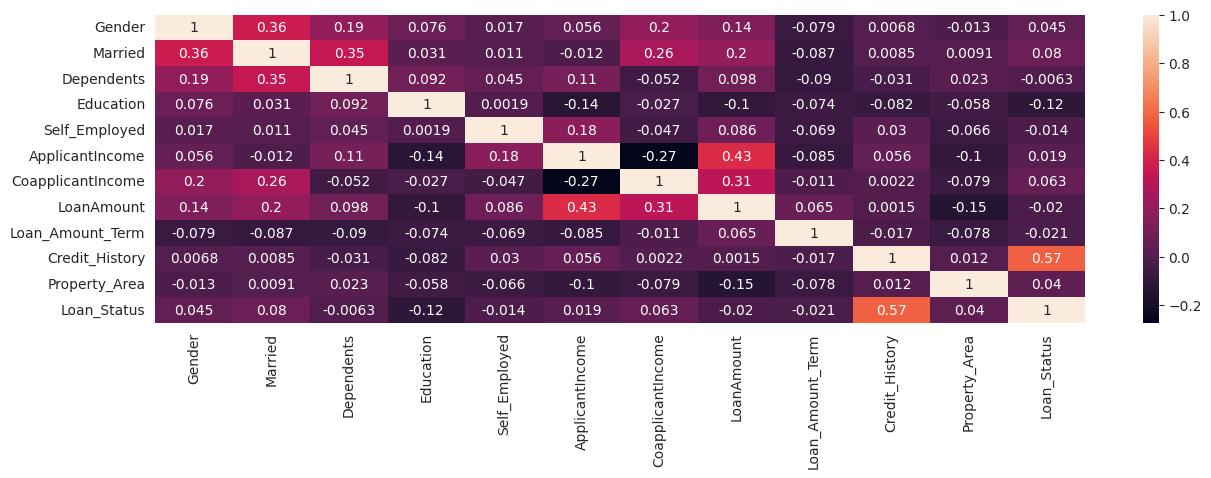

In [19]:
plt.figure(figsize=(15,4))
sns.heatmap(df_mod.corr(), annot=True)

plt.savefig("my_plot.png")
from google.colab import files
# files.download("my_plot.png")

plt.show()


# BEST MODEL SELECTION


==================== MODEL PERFORMANCE (ACCURACY) ====================

Logistic Regression: Accuracy = 0.8269
KNN Classifier: Accuracy = 0.7212
Support Vector Classifier (SVC): Accuracy = 0.8269
MLP Neural Network Classifier: Accuracy = 0.7885
SGD Classifier: Accuracy = 0.8269
Decision Tree Classifier: Accuracy = 0.7404
Random Forest Classifier: Accuracy = 0.7981
Extra Trees Classifier: Accuracy = 0.7308
Gradient Boosting Classifier: Accuracy = 0.7885
AdaBoost Classifier: Accuracy = 0.8269
Bagging Classifier: Accuracy = 0.7404
XGBoost Classifier: Accuracy = 0.7788
[LightGBM] [Info] Number of positive: 290, number of negative: 126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 331
[LightGBM] [Info] Number of data points in the train set: 416, number of used features: 11
[LightGBM]

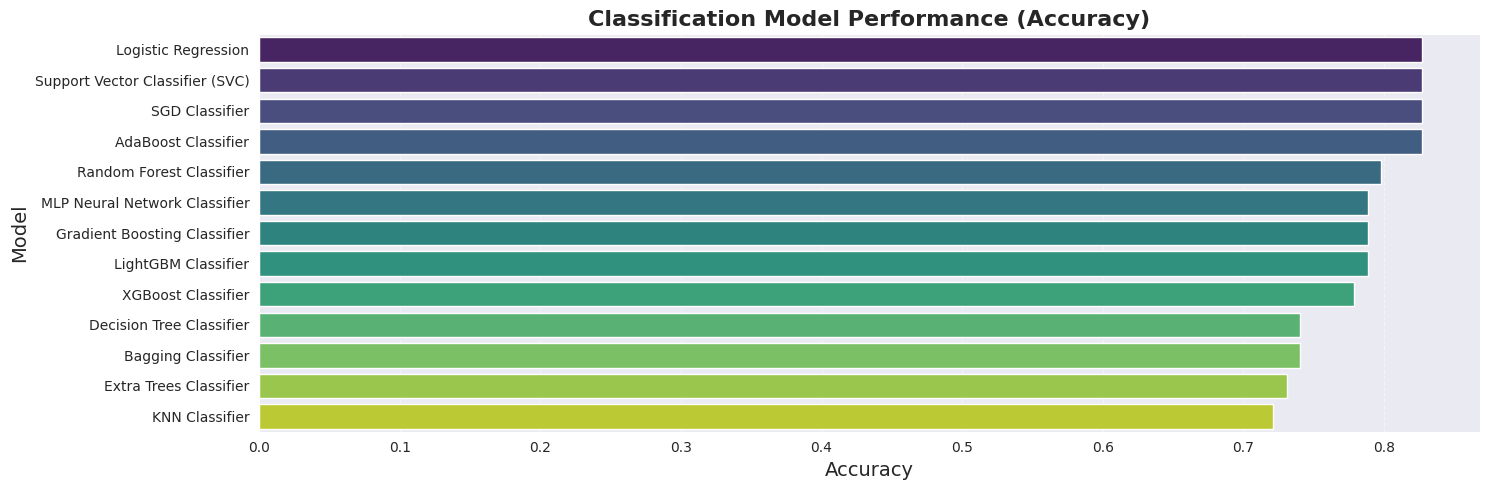

In [20]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ===============================================
# FIX TARGET COLUMN (Loan_Status)
# ===============================================
df_mod["Loan_Status"] = df_mod["Loan_Status"].astype("category").cat.codes
# Y = 1, N = 0

# ===============================================
# DATA
# ===============================================
X = df_mod.drop(columns=["Loan_Status"], axis=1)
y = df_mod["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================================
# SCALING
# ===============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ===============================================
# TRY IMPORT ADVANCED CLASSIFICATION MODELS
# ===============================================
advanced_models = {}

try:
    from xgboost import XGBClassifier
    advanced_models["XGBoost Classifier"] = XGBClassifier(
        eval_metric="logloss",
        learning_rate=0.05,
        max_depth=6,
        n_estimators=400,
        subsample=0.8,
        colsample_bytree=0.8
    )
except:
    pass

try:
    from lightgbm import LGBMClassifier
    advanced_models["LightGBM Classifier"] = LGBMClassifier(
        learning_rate=0.05,
        n_estimators=400
    )
except:
    pass

try:
    from catboost import CatBoostClassifier
    advanced_models["CatBoost Classifier"] = CatBoostClassifier(
        verbose=False,
        depth=8,
        iterations=400,
        learning_rate=0.05
    )
except:
    pass


# ===============================================
# BASIC CLASSIFICATION MODELS
# ===============================================
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

models = {
    "Logistic Regression": (LogisticRegression(max_iter=2000), True),
    "KNN Classifier": (KNeighborsClassifier(n_neighbors=5, weights="distance"), True),
    "Support Vector Classifier (SVC)": (SVC(), True),
    "MLP Neural Network Classifier": (MLPClassifier(max_iter=3000), True),
    "SGD Classifier": (SGDClassifier(), True),

    "Decision Tree Classifier": (DecisionTreeClassifier(), False),
    "Random Forest Classifier": (RandomForestClassifier(), False),
    "Extra Trees Classifier": (ExtraTreesClassifier(), False),
    "Gradient Boosting Classifier": (GradientBoostingClassifier(), False),
    "AdaBoost Classifier": (AdaBoostClassifier(), False),
    "Bagging Classifier": (BaggingClassifier(), False)
}

# Add advanced models
for name, model in advanced_models.items():
    models[name] = (model, False)


# ===============================================
# EVALUATE ALL MODELS
# ===============================================
scores = {}

print("\n==================== MODEL PERFORMANCE (ACCURACY) ====================\n")

from sklearn.metrics import accuracy_score

for name, (model, need_scaling) in models.items():
    try:
        if need_scaling:
            model.fit(X_train_scaled, y_train)
            pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            pred = model.predict(X_test)

        acc = accuracy_score(y_test, pred)
        scores[name] = acc

        print(f"{name}: Accuracy = {acc:.4f}")

    except Exception as e:
        print(f"{name}:  Skipped (Error)")


# ===============================================
# SORT RESULTS
# ===============================================
sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

print("\n==================== SORTED ACCURACY (DESC) ====================")
for model, score in sorted_scores:
    print(f"{model}: {score:.4f}")

best_model = sorted_scores[0]
print("\n BEST MODEL =", best_model[0])
print(" Accuracy =", round(best_model[1], 4))


# ===============================================
#  ACCURACY BAR PLOT
# ===============================================
plot_df = pd.DataFrame(sorted_scores, columns=["Model", "Score"])

plt.figure(figsize=(15, 5))
sns.barplot(data=plot_df, x="Score", y="Model", palette="viridis")

plt.title("Classification Model Performance (Accuracy)", fontsize=16, fontweight='bold')
plt.xlabel("Accuracy", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [21]:
df_mod.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

x = df_mod.drop(columns='Loan_Status', axis=0)
y = df_mod['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# ***LogisticRegression Model***

In [23]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

lr_model.fit(x_train, y_train)

print(f"Your model Accurecy is: {(lr_model.score(x_train, y_train))*100:.4f}%")

Your model Accurecy is: 82.9327%
